## Wine dataset visualization, PCA and t test.

In this notebook wine dataset analysis is presented. Even though it is public dataset, and a lot of analysis is previously performed on this data, there are couple of new components presented. For example paired t-test for each pair of atributes vs wine classes and PCA.

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sbr
from matplotlib import pyplot as plt

#import sklearn library:
from sklearn import tree
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import sklearn.linear_model 
from mpl_toolkits.mplot3d import Axes3D as Axes3D
from sklearn.decomposition import PCA
from sklearn import cross_validation
from sklearn.ensemble import AdaBoostClassifier
from sklearn import grid_search
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
# Read dataset, add column names and convert dataset to convinient form by extracting labels y and attributs x

data = pd.read_csv("wine.data.txt",names=["Class","Alcohol","Malic Alic","Ash","Alcanility of Ash","Magnesium",
                    "Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280_OD315_diluted wines",
                    "Proline"])
y = data["Class"].values
x = data.iloc[:,1:]


## Explore dataset:

In [4]:
# First glance on data:
x.head()

,Alcohol,Malic Alic,Ash,Alcanility of Ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280_OD315_diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
# data dimensions:
x.shape

(178, 13)

In [6]:
# check how label data looks:
np.unique(y)

array([1, 2, 3])

In [7]:
# summary on dataset:
x.describe()

,Alcohol,Malic Alic,Ash,Alcanility of Ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280_OD315_diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
x.columns.values

array(['Alcohol', 'Malic Alic', 'Ash', 'Alcanility of Ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280_OD315_diluted wines', 'Proline'], dtype=object)

In [9]:
#count how many exaxmples for each wine class is in dataset:
data.Class.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

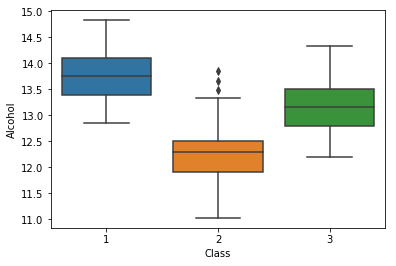

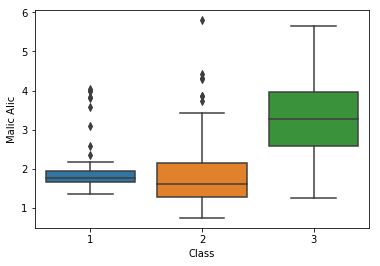

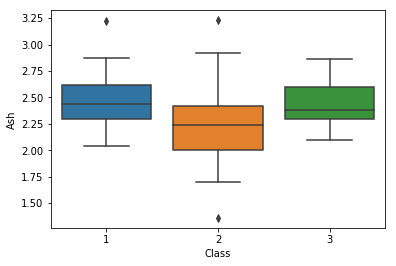

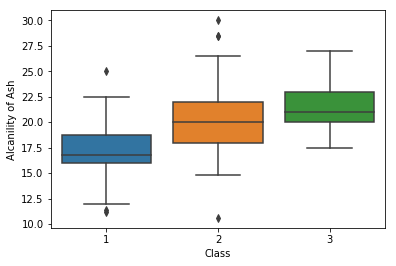

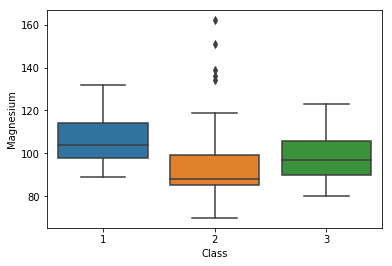

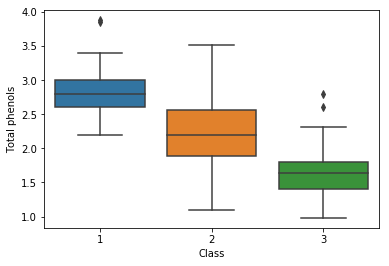

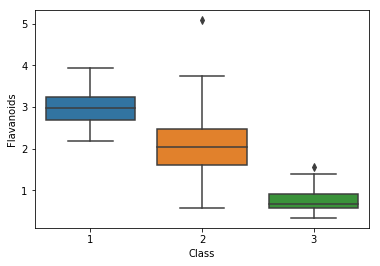

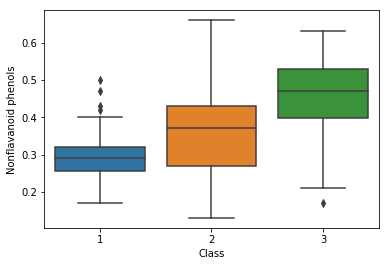

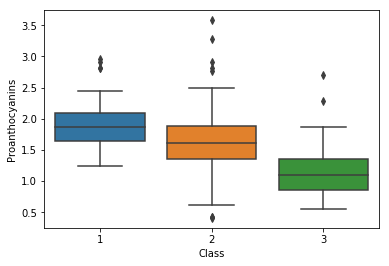

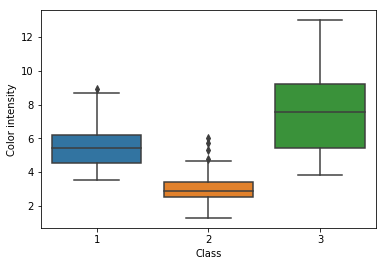

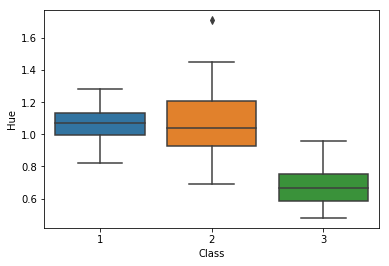

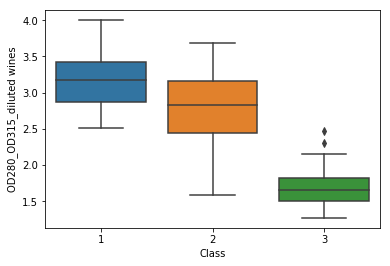

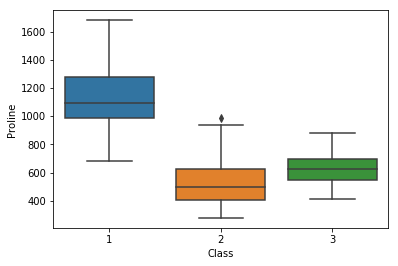

In [10]:
#box-plot wine data by attributes vs type:

#get column names from wine data:
attributes = x.columns.values

for attribute in attributes: 
    sbr.boxplot(y=data.loc[:,attribute], x = data.loc[:,"Class"], data=data)
    plt.show()

According to boxplots for most of wine attributes wine classes are distunguishable with some exceptions:
- Hue for Class 1 and Class 2
- Magnesium for Class 1 and Class 3
- Ash Class 1 and Class 3
- Malic Alic for Class 1 snd Class 2

Lets perform t-test for all paires of classes vs all atributes to prove assumptions:

In [11]:
# t-test for all pairs and attributes:
#only print result if p-value is greater than alpha:

print("Compare Class 1 and Class 2")
for attribute in attributes:
    t, p = stats.ttest_ind(data.loc[data["Class"] == 1, attribute],\
                         data.loc[data["Class"] == 2, attribute], equal_var = False )
    if p >0.05:
        print("with 95% confidence means are different") 
        print("Attribute:", attribute)
        print("p-value = " + str(p))
        print("-----------------------------")
    
print("Compare Class 1 and Class 3")
for attribute in attributes:
    t, p = stats.ttest_ind(data.loc[data["Class"] == 1, attribute],\
                         data.loc[data["Class"] == 3, attribute], equal_var = False )
    if p >0.05:
        print("with 95% confidence means are different") 
        print("Attribute:", attribute)
        print("p-value = " + str(p))
        print("-----------------------------")
        
print("Compare Class 2 and Class 3")
for attribute in attributes:
    t, p = stats.ttest_ind(data.loc[data["Class"] == 2, attribute],\
                         data.loc[data["Class"] == 3, attribute], equal_var = False )
    if p >0.05:
        print("with 95% confidence means are different") 
        print("Attribute:", attribute)
        print("p-value = " + str(p))    
        print("-----------------------------")


Compare Class 1 and Class 2
with 95% confidence means are different
Attribute: Malic Alic
p-value = 0.6044843798557245
-----------------------------
with 95% confidence means are different
Attribute: Hue
p-value = 0.8401887149047079
-----------------------------
Compare Class 1 and Class 3
with 95% confidence means are different
Attribute: Ash
p-value = 0.642972972960212
-----------------------------
Compare Class 2 and Class 3
with 95% confidence means are different
Attribute: Magnesium
p-value = 0.06269665759073226
-----------------------------


According to boxplots for most of wine attributes wine classes have distunguishable means with some exceptions:
- Hue for Class 1 and Class 2
- Magnesium for Class 1 and Class 3
- Ash Class 1 and Class 3
- Malic Alic for Class 1 snd Class 2

This fully prove conclusion made for box plots.

In order to anderstand how wine classes are separable in general below PCA with 2 components is performed:

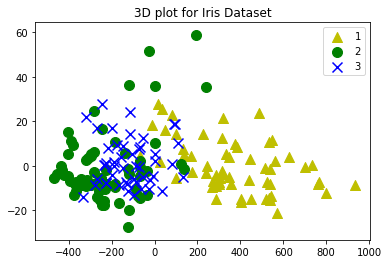

Explained varience by component: [0.99809123 0.00173592]
Total Explained varience: 0.9998271461166032


In [12]:
# 3D plot: applying PCA with 3 components:
from mpl_toolkits.mplot3d import Axes3D as Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(1)

#Fit PCA with 3 components to data:
pca = PCA(n_components=2)
pca.fit(data.iloc[:,1:])


# using PCA reduce dimensions from 4 variables stored in iris 1:4 columns to 3 and assign new data to iris_PCA
data_PCA = PCA(n_components=3).fit_transform(data.iloc[:,1:])
#create color, marker and flower types:

color = ["y", "g", "b"]
marker = ["^", "o", "x"]
ftype = data.iloc[:,0].unique()

#iterate over PCA data and build graph for each iris type:
for i in range(len(color)):
    
    plt.scatter(data_PCA[data.iloc[:,0]==ftype[i],0], data_PCA[data.iloc[:,0]==ftype[i],1],\
               marker = marker[i], s=100, c = color[i])
#title 
plt.title("3D plot for Iris Dataset") 

#legend by flower type:
plt.legend(ftype) 

plt.show()    

#print amount of explained varience for each component:
print("Explained varience by component:", pca.explained_variance_ratio_)
print("Total Explained varience:", sum(pca.explained_variance_ratio_))





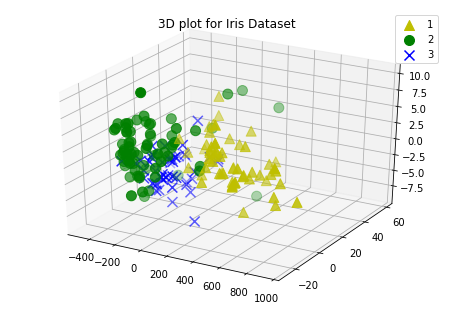

Explained varience by component: [9.98091230e-01 1.73591562e-03 9.49589576e-05]
Total Explained varience: 0.9999221050741547


In [13]:
# 3D plot: applying PCA with 3 components:
from mpl_toolkits.mplot3d import Axes3D as Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(1)
ax = Axes3D(fig)

#Fit PCA with 3 components to data:
pca = PCA(n_components=3)
pca.fit(data.iloc[:,1:])


# using PCA reduce dimensions from 4 variables stored in iris 1:4 columns to 3 and assign new data to iris_PCA
data_PCA = PCA(n_components=3).fit_transform(data.iloc[:,1:])
#create color, marker and flower types:

color = ["y", "g", "b"]
marker = ["^", "o", "x"]
ftype = data.iloc[:,0].unique()

#iterate over PCA data and build graph for each iris type:
for i in range(len(color)):
    
    ax.scatter(data_PCA[data.iloc[:,0]==ftype[i],0], data_PCA[data.iloc[:,0]==ftype[i],1],\
           data_PCA[data.iloc[:,0]==ftype[i],2], marker = marker[i], s=100, c = color[i])
#title 
ax.set_title("3D plot for Iris Dataset") 

#legend by flower type:
ax.legend(ftype) 

plt.show()    

#print amount of explained varience for each component:
print("Explained varience by component:", pca.explained_variance_ratio_)
print("Total Explained varience:", sum(pca.explained_variance_ratio_))




From PCA with 2 components can be concluded that class 1 in general well distinguishable with other class, with overlay between class 2 and 3. For 3 cpmponent PCA situation with overlap between 2 and 3 class is a bit better, suggesting that classes are popettially separable as we look in more dimensions.